<a href="https://colab.research.google.com/github/Lucena-Marcos/Analise_Acoes/blob/main/OIBR3.SA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

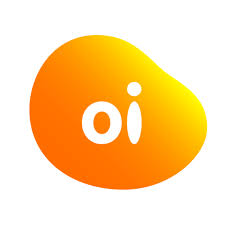








# **ANALISE ACIONÁRIA DA OIBR3**







---










**INSIRA O CODIGO DA AÇÃO QUE VOCÊ QUER ANALISAR**

In [1]:
triker = ["OIBR3.SA"]

In [2]:
!pip install yfinance --upgrade --no-cache-dir

     |████████████████████████████████| 5.5MB 13.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=d055999ad7959c7304c7e99f1b260f83fc7a56a731fedb037d3e0d8b8428d379
  Stored in directory: /tmp/pip-ephem-wheel-cache-hha3cf0m/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
# pandas é usado para ler o nosso data frame
import pandas as pd
#
import string
#
from datetime import datetime
#
import pandas_datareader.data as web

# o plotly offline possibilita mostrar o grafico notebook
# e caso a gente queira salvar o grafico cono png
import plotly.offline as py

# é responsavel por criar os graficos de fato
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

#
import plotly.io as pio
pio.renderers.default = 'colab'

# parametro de entrada de dados
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

***EXTREMAMENTE NECESSARIO CONVERTER OS VALORES PARA FLOAT***

> SEM A CONVERÇÃO OCORRE ERRO NA DATA



In [4]:
# a variavel data é uma tupla
df = pdr.get_data_yahoo(triker,period="max")

# É necessario converter o dataframe para conseguirmos execultar o plotly
#Reseting the index
df = df.reset_index()

#Converting the datatype to float
for i in ['Open', 'High', 'Close', 'Low']:
    df[i] = df[i].astype('float64')

[*********************100%***********************]  1 of 1 completed


# **GRÁFICO EM LINHA**

> **DE 2002 ATÉ 2021**



In [5]:
fig = go.Figure([go.Scatter(x=df['Date'], y=df['Close'])])
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    title = "AÇÕES DA OIBR3.SA",
    title_x = 0.5,
    yaxis_title = "OIBR3 PREÇOS")

fig.show()

# **GRÁFICO CANDLESTICK**

In [6]:
#
fig = go.Figure(data=[go.Candlestick(
                x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(
    title = "AÇÕES DA OIBR3.SA",
    title_x = 0.5,
    yaxis_title = "OIBR3 PREÇOS")

fig.show()

In [7]:
# plotagem dos dados
df['MM_3'] = df.Close.rolling(window = 30, min_periods=1).mean()

In [8]:

ativo = go.Candlestick(
                x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name = "Fechamento OIBR3.SA",
                opacity = 0.8)

MM_3 = go.Scatter(
                x= df['Date'],
                y = df["MM_3"], 
                name = "MÉDIA MOVEL OIBR3.SA",
                line = dict (color = '#FF00FF'),
                opacity = 0.8)

data = [ativo,MM_3]

layout = dict (
    title = "Valores das Ações vs Média Movel",
    title_x = 0.5)

fig = dict (data = data, layout=layout)
py.iplot(fig)